## Importing necessary modules

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

import numpy as np

## Load Dataset

In [2]:
x_train = np.loadtxt('input.csv',delimiter=',')
y_train = np.loadtxt('labels.csv',delimiter=',')

x_test = np.loadtxt('input_test.csv',delimiter=',')
y_test = np.loadtxt('labels_test.csv',delimiter=',')

In [3]:
# shape of dataset
print("shape of x_train : ",x_train.shape)
print("shape of y_train : ",y_train.shape)
print("shape of x_test : ",x_test.shape)
print("shape of y_test : ",y_test.shape)

# every pic is of 100X100 pixels and 3 RGB Channels i.e. why 30000 features we have

shape of x_train :  (2000, 30000)
shape of y_train :  (2000,)
shape of x_test :  (400, 30000)
shape of y_test :  (400,)


In [4]:
# we should then reshape these 
x_train = x_train.reshape(len(x_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)
x_test = x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

# shape of dataset
print("shape of x_train : ",x_train.shape)
print("shape of y_train : ",y_train.shape)
print("shape of x_test : ",x_test.shape)
print("shape of y_test : ",y_test.shape)

shape of x_train :  (2000, 100, 100, 3)
shape of y_train :  (2000, 1)
shape of x_test :  (400, 100, 100, 3)
shape of y_test :  (400, 1)


In [5]:
x_train[1,:]
# when we see the single image data we will find that the RGB values lies between 0 to 255 so we have to range it in 0 to 1

array([[[131., 128., 135.],
        [160., 157., 164.],
        [198., 192., 204.],
        ...,
        [250., 249., 247.],
        [255., 255., 253.],
        [250., 249., 245.]],

       [[140., 137., 144.],
        [127., 124., 131.],
        [120., 114., 124.],
        ...,
        [251., 253., 252.],
        [254., 255., 253.],
        [254., 255., 251.]],

       [[204., 202., 207.],
        [187., 185., 190.],
        [147., 142., 148.],
        ...,
        [249., 255., 255.],
        [238., 247., 242.],
        [232., 241., 236.]],

       ...,

       [[174., 182., 195.],
        [172., 180., 193.],
        [178., 186., 197.],
        ...,
        [ 87., 114.,  97.],
        [ 75.,  99.,  83.],
        [ 80., 105.,  86.]],

       [[166., 173., 189.],
        [164., 172., 185.],
        [172., 180., 193.],
        ...,
        [ 78., 106.,  84.],
        [ 72.,  97.,  76.],
        [ 77., 102.,  81.]],

       [[173., 180., 196.],
        [172., 179., 195.],
        [174., 1

In [6]:
# to range the value we have to divide it by 255 
x_train = x_train/255.0
x_test = x_test/255.0

x_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

## Display our Image 

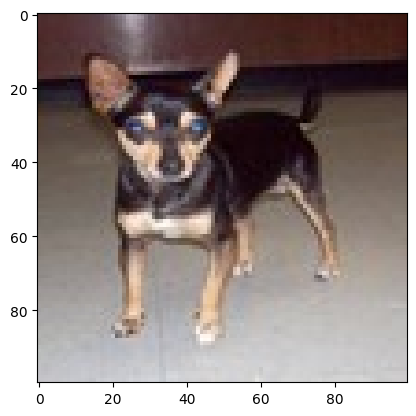

In [8]:
import random
import matplotlib.pyplot as plt

idx=random.randint(0,len(x_train))
plt.imshow(x_train[idx,:])

## Model

In [9]:
model = Sequential([
    Conv2D(32, (3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

C:\Users\Priya_Laptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
 # same way of writting the above
model = Sequential()

model.add(Conv2D(32, (3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
model.fit(x_train,y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - accuracy: 0.5033 - loss: 0.8045
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.6255 - loss: 0.6579
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.6903 - loss: 0.6004
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.7215 - loss: 0.5531
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - accuracy: 0.7732 - loss: 0.5004


In [13]:
model.fit(x_train,y_train,epochs=5,batch_size=64)
model.evaluate(x_test,y_test)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - accuracy: 0.8130 - loss: 0.4212
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.8594 - loss: 0.3532
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.8830 - loss: 0.2941
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.9162 - loss: 0.2272
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.9415 - loss: 0.1876
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6344 - loss: 0.9681


[0.8445408344268799, 0.6675000190734863]

In [14]:
model.fit(x_train,y_train,epochs=5,batch_size=64)
model.evaluate(x_test,y_test)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.9604 - loss: 0.1352
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.9668 - loss: 0.1058
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.9857 - loss: 0.0668
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.9921 - loss: 0.0471
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.9965 - loss: 0.0321
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5954 - loss: 1.5992


[1.3623791933059692, 0.6474999785423279]

## Making predictions 

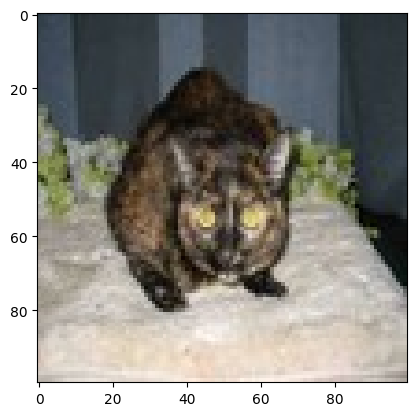

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Our model say it is the : dog


In [15]:
idx2=random.randint(0,len(y_test))
plt.imshow(x_test[idx2,:])
plt.show()

y_pred=model.predict(x_test[idx2,:].reshape(1,100,100,3))
y_pred=y_pred>0.5

if(y_pred==0):
    pred='dog'
else:
    pred='cat'

print("Our model say it is the :",pred)

In [ ]:
model.save('cat_dog_classification_model.h5')